In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import glob
pd.options.display.max_rows = 200
pd.options.display.max_columns = 50

GL_DIR = "c:/users/matho/python/baseball/retrosheet/game_logs"

gldf = pd.read_hdf(GL_DIR + "/all_game_logs.h5","game_logs_df")

gldf['FULL_INNINGS'] = gldf['OUTS_CT'] // 6
gldf['AWAY_OUTS'] = gldf.FULL_INNINGS * 3 + ((gldf['OUTS_CT'] - gldf.FULL_INNINGS * 6 ) % 6).clip(0,3)
gldf['HOME_OUTS'] = gldf.OUTS_CT - gldf.AWAY_OUTS

gldf['HOME_WIN'] = 1*(gldf.HOME_SCORE_CT > gldf.AWAY_SCORE_CT)
gldf['AWAY_WIN'] = 1*(gldf.HOME_SCORE_CT <= gldf.AWAY_SCORE_CT)
gldf['ZERO'] = 0
pfadf = gldf[['YEAR','GAME_ID','AWAY_TEAM_ID','AWAY_SCORE_CT','HOME_SCORE_CT','ZERO','ZERO','AWAY_WIN','HOME_WIN','ZERO','ZERO','AWAY_OUTS','HOME_OUTS','ZERO','ZERO']]
pfhdf = gldf[['YEAR','GAME_ID','HOME_TEAM_ID','ZERO','ZERO','HOME_SCORE_CT','AWAY_SCORE_CT','ZERO','ZERO','HOME_WIN','AWAY_WIN','ZERO','ZERO','HOME_OUTS','AWAY_OUTS']]
pfadf.columns = ['YEAR','GAME_ID','TEAM_ID','RS_AWAY','RA_AWAY','RS_HOME','RA_HOME','AWAY_WIN','AWAY_LOSS','HOME_WIN','HOME_LOSS','AWAY_BAT_OUTS','AWAY_PIT_OUTS','HOME_BAT_OUTS','HOME_PIT_OUTS']
pfhdf.columns = ['YEAR','GAME_ID','TEAM_ID','RS_AWAY','RA_AWAY','RS_HOME','RA_HOME','AWAY_WIN','AWAY_LOSS','HOME_WIN','HOME_LOSS','AWAY_BAT_OUTS','AWAY_PIT_OUTS','HOME_BAT_OUTS','HOME_PIT_OUTS']
pfdf = pd.concat([pfadf,pfhdf],axis=0)

pftdf = pfdf.groupby(['YEAR',"TEAM_ID"]).sum()

pftdf['TOTAL_RUNS_HOME'] = pftdf.RS_HOME + pftdf.RA_HOME
pftdf['TOTAL_RUNS_AWAY'] = pftdf.RS_AWAY + pftdf.RA_AWAY

pftdf['RAW_PF'] = (pftdf.TOTAL_RUNS_HOME)/(pftdf.TOTAL_RUNS_AWAY)

pftdf['HOME_WIN_PCT'] = (pftdf.HOME_WIN)/(pftdf.HOME_WIN + pftdf.HOME_LOSS)
pftdf['AWAY_WIN_PCT'] = (pftdf.AWAY_WIN)/(pftdf.AWAY_WIN + pftdf.AWAY_LOSS)

pftdf['BR_IPC'] = (18.5 - pftdf.HOME_WIN_PCT)/(18.5 - (1 - pftdf.AWAY_WIN_PCT))
pftdf['BR_IPC_PF'] = pftdf.RAW_PF / pftdf.BR_IPC

pftdf['IPC'] = (pftdf.HOME_BAT_OUTS + pftdf.HOME_PIT_OUTS)/(pftdf.AWAY_BAT_OUTS + pftdf.AWAY_PIT_OUTS)
pftdf['IPC_PF'] = pftdf.RAW_PF / pftdf.IPC


In [12]:
current_teams = [x for x in pftdf.reset_index().query('YEAR == 2021').TEAM_ID.unique()]

In [51]:
pftdf.loc[(slice(1901,2022),[x for x in current_teams]),:].BR_IPC_PF.unstack(1)["BOS"]

YEAR
1901    0.875967
1902    1.006320
1903    1.221185
1904    1.123874
1905    1.018704
1906    1.012164
1907    1.016318
1908    0.939524
1909    1.210398
1910    0.995811
1911    0.938066
1912    1.121650
1913    1.068440
1914    0.896706
1915    0.891725
1916    0.805567
1917    1.151642
1918    1.057634
1919    0.736710
1920    0.867192
1921    0.949984
1922    0.830315
1923    1.085912
1924    1.053963
1925    0.905402
1926    1.058001
1927    0.932578
1928    0.892994
1929    1.052671
1930    0.801983
1931    0.938978
1932    0.958691
1933    0.962051
1934    1.147085
1935    1.221357
1936    1.071515
1937    0.978357
1938    1.036488
1939    1.165699
1940    1.104110
1941    1.067614
1942    1.088416
1943    1.064316
1944    0.979021
1945    0.902203
1946    1.327769
1947    1.270536
1948    1.022109
1949    1.130998
1950    1.367213
1951    1.129151
1952    1.169361
1953    1.156475
1954    1.071636
1955    1.603913
1956    1.088046
1957    1.241194
1958    1.124448
1959    1

In [17]:
pfdf = pftdf.reset_index()

<AxesSubplot:xlabel='YEAR'>

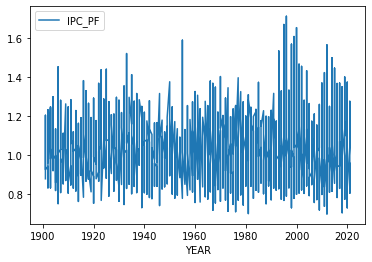

In [27]:
pfdf[ & (pfdf.YEAR >= 1901)][['YEAR','TEAM_ID','IPC_PF']].set_index("TEAM_ID").plot(x='YEAR',y='IPC_PF')